In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.utils import resample
import re
import joblib
import string
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
fake = pd.read_csv('fake.csv')
true = pd.read_csv('true.csv')

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake['class']=0
true['class']=1

In [6]:
data = pd.concat([fake,true], axis = 0)

In [7]:
data.sample(20)

,title,text,subject,date,class
20337,Iraqi Kurdish official says Iraqi vote rejecti...,"ERBIL, Iraq (Reuters) - A vote by Iraq s parli...",worldnews,"September 12, 2017",1
17180,New Zealand's kingmaker party sets Thursday to...,WELLINGTON (Reuters) - New Zealand s small nat...,worldnews,"October 17, 2017",1
12388,Jewish groups in Germany urge crackdown on ant...,BERLIN (Reuters) - Jewish groups in Germany ar...,worldnews,"December 13, 2017",1
601,#TrumpChicken Is Now Trending And These Tweet...,"Earlier today, CBS News and other outlets noti...",News,"August 9, 2017",0
109,Factbox: What's in the final U.S. Republican t...,(Reuters) - The U.S. Congress is expected to v...,politicsNews,"December 16, 2017",1
6177,WATCH: Kimmel Tells Hypocrite Trump He’s ‘Ful...,Donald Trump s past support of Hillary Clinton...,News,"May 26, 2016",0
6154,"Trump, in Oval Office, signs first order on Ob...",WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"January 21, 2017",1
21363,Defense Secretary Mattis promises support to U...,KIEV (Reuters) - U.S. Defense Secretary Jim Ma...,worldnews,"August 24, 2017",1
2612,WATCH: Colbert Asks Tapper How CNN Staff Feel...,Donald Trump is no fan of CNN. He has repeated...,News,"February 9, 2017",0
21304,U.S. navy recovers remains of all sailors miss...,SINGAPORE (Reuters) - The U.S. Navy on Monday ...,worldnews,"August 28, 2017",1


In [8]:
data = data.drop(["title","subject","date"], axis = 1)

In [9]:
data.reset_index(inplace=True)

In [10]:
data.drop(['index'],axis=1,inplace=True)

In [11]:
data.sample


<bound method NDFrame.sample of                                                     text  class
0      Donald Trump just couldn t wish all Americans ...      0
1      House Intelligence Committee Chairman Devin Nu...      0
2      On Friday, it was revealed that former Milwauk...      0
3      On Christmas day, Donald Trump announced that ...      0
4      Pope Francis used his annual Christmas Day mes...      0
...                                                  ...    ...
44893  BRUSSELS (Reuters) - NATO allies on Tuesday we...      1
44894  LONDON (Reuters) - LexisNexis, a provider of l...      1
44895  MINSK (Reuters) - In the shadow of disused Sov...      1
44896  MOSCOW (Reuters) - Vatican Secretary of State ...      1
44897  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...      1

[44898 rows x 2 columns]>

In [12]:
data.sample(5)

,text,class
33274,WASHINGTON (Reuters) - Democrats on a powerful...,1
3569,Trump (once again) may be losing his biggest c...,0
36135,DUBAI (Reuters) - British Foreign Secretary Bo...,1
30865,(Reuters) - The 2016 election cycle had been a...,1
21099,"She s the most dangerous, self-centered woman ...",0


In [13]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[*?.\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text


In [14]:
data['text'] = data['text'].apply(clean_text)

In [15]:
data.sample(15)


,text,class
23481,washington reuters the head of a conservative...,1
5005,the new head of donald trump s presidential ca...,0
20823,january can t come fast enough for america an...,0
24291,tokyo reuters us president donald trump and j...,1
6490,the list of establishment republicans who are ...,0
2700,whiny white house advisor kellyanne conway doe...,0
543,in the wake of donald trump s unhinged and ram...,0
44224,paris reuters french police unearthed a secon...,1
27173,washington reuters three us democratic senato...,1
6746,republicans in oklahoma just took their war on...,0


In [16]:
true = resample(true,
                replace=True,  # allow duplicates
                 n_samples=len(fake),  # match fake_df size
                random_state=42)

# Step 3: Combine the balanced datasets
balance = pd.concat([fake, true], ignore_index=True)

# Optional: Shuffle the combined dataset
balance = balance.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 4: Save or use the balanced dataset
balance.to_csv('balanced_dataset.csv', index=False)


In [17]:
df = pd.read_csv('balanced_dataset.csv')

In [18]:
print(balance.columns)

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')


In [19]:
data.sample(20)


,text,class
35812,new delhi reuters a hindu man in india tried ...,1
21941,when it comes to interpreting current events n...,0
14373,a report just came out about the crazy huge nu...,0
38561,aden reuters the saudiled military coalition ...,1
35634,buenos aires reuters argentina s lower house ...,1
32300,new york reuters hillary clinton disputed a s...,1
37091,istanbul reuters turkish prosecutors have iss...,1
22052,century wire says while everyone is busy hypi...,0
4475,donald trump spent monday night making a total...,0
10896,four candidates for fbi director are being int...,0


In [20]:
balance['class']  # if your label column is named 'class'

0        0
1        1
2        0
3        1
4        0
        ..
46957    0
46958    1
46959    1
46960    0
46961    0
Name: class, Length: 46962, dtype: int64

In [21]:
balance.rename(columns={'class': 'label'}, inplace=True)

<Axes: xlabel='label', ylabel='count'>

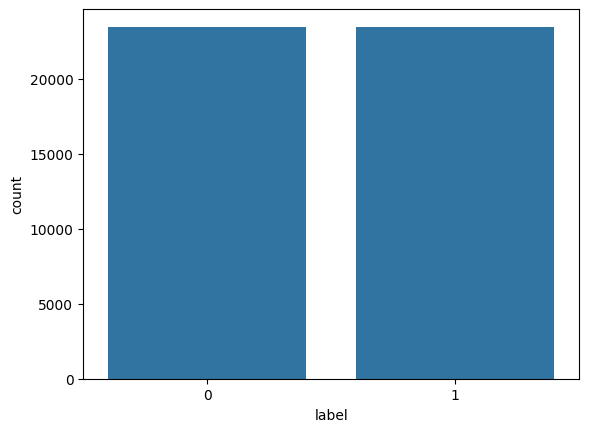

In [22]:
sns.countplot(data=balance, x='label', order=balance['label'].value_counts().index)

In [23]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[*?.\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text



In [24]:
data['text'] = data['text'].apply(clean_text)

In [25]:
data.sample(100)

,text,class
40365,johannesburg reuters jacob zuma s spokesman sa...,1
4858,halfterm governor of alaska and professional g...,0
14393,wake me when it s over what the heck people we...,0
40124,vienna reuters austrian conservative leader se...,1
36946,moscow reuters russian prime minister dmitry m...,1
...,...,...
18663,you re never to young to commit jihad teachers...,0
36166,mexico city reuters mexican president enrique ...,1
17225,this is so great ted cruz knows his constitution,0
16188,ben sasse asked supreme court nominee neil gor...,0


In [26]:
print(df.isnull().sum())


title      0
text       0
subject    0
date       0
class      0
dtype: int64


In [32]:
# Split the balanced dataset into train and test sets
X = balance['text']
y = balance['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4607
           1       0.98      0.99      0.99      4786

    accuracy                           0.99      9393
   macro avg       0.99      0.99      0.99      9393
weighted avg       0.99      0.99      0.99      9393



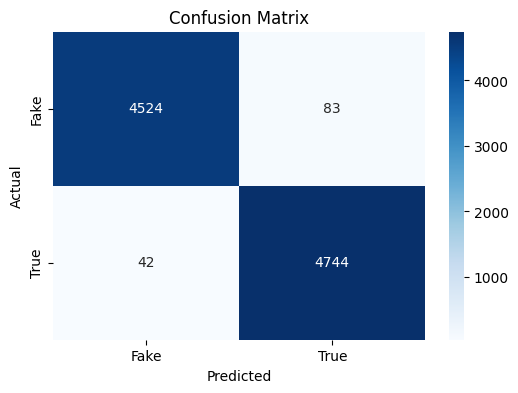

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

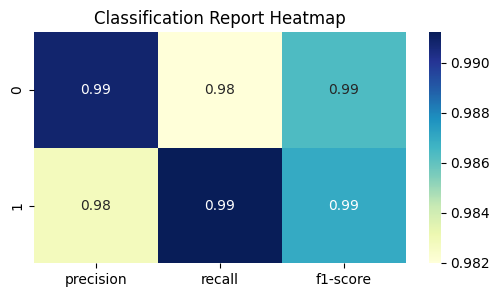

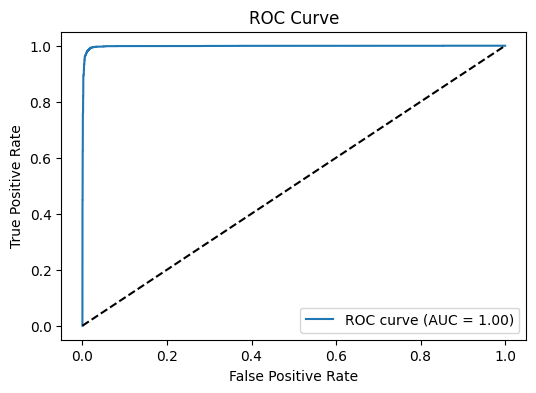

In [29]:
from sklearn.metrics import classification_report, roc_curve, auc
import numpy as np

# Classification report as heatmap
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose().iloc[:2, :3]  # Only 'Fake' and 'True' rows, and precision/recall/f1
plt.figure(figsize=(6,3))
sns.heatmap(report_df, annot=True, cmap='YlGnBu')
plt.title('Classification Report Heatmap')
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [31]:
import pickle

# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
